In [12]:
import pandas as pd
df=pd.read_csv(r"C:\Users\vasup\Downloads\cms_like_hospital_readmissions.csv")
df.shape
df.head()
df["high_risk"].value_counts(normalize=True)


high_risk
1    0.559167
0    0.440833
Name: proportion, dtype: float64

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
confusion_matrix,
classification_report,
roc_auc_score,
roc_curve
)


In [14]:
df=pd.read_csv(r"C:\Users\vasup\Downloads\cms_like_hospital_readmissions.csv")
df.head()


,facility_id,state,num_discharges,predicted_readmission_rate,expected_readmission_rate,excess_readmission_ratio,high_risk,avg_length_of_stay,ed_visit_rate,chronic_condition_index,avg_claim_amount
0,HOSP100000,OH,275,13.97,16.90,0.827,0,4.46,24.6,2.35,15894.0
1,HOSP100001,WI,4782,17.57,17.02,1.032,1,5.06,27.1,3.23,15936.0
2,HOSP100002,CT,3746,11.33,12.03,0.942,0,4.53,26.6,2.70,18411.0
3,HOSP100003,MA,3433,10.53,19.12,0.700,0,2.55,23.9,3.21,19641.0
4,HOSP100004,NJ,1753,8.99,13.25,0.700,0,6.38,2.0,3.55,21679.0


In [15]:
features=[
    "num_discharges",
    "avg_length_of_stay",
    "ed_visit_rate",
    "chronic_condition_index",
    "avg_claim_amount"
]
X=df[features]
y=df["high_risk"]


In [16]:
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [17]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [18]:
X_train_scaled[:5]


array([[-1.38735419,  0.04230541,  1.63048881,  0.08749793,  0.9660685 ],
       [-1.05215021, -0.59730125, -1.64781472,  0.25263453, -0.99069885],
       [ 0.15968502,  0.98344093, -1.20595642, -0.66112131,  0.04258693],
       [ 0.63844374,  1.09308779, -0.92088655, -0.51800292,  0.09107597],
       [ 0.91462266,  0.38952046, -0.89237956,  0.17557078, -1.34701508]])

In [19]:
log_reg=LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [20]:
log_reg.coef_


array([[ 0.0932305 , -0.01886147, -0.03940562, -0.10454679, -0.11599536]])

In [21]:
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)


In [23]:
pd.Series(y_prob).describe()



count    300.000000
mean       0.496599
std        0.047743
min        0.347870
25%        0.466804
50%        0.500100
75%        0.529021
max        0.627915
dtype: float64

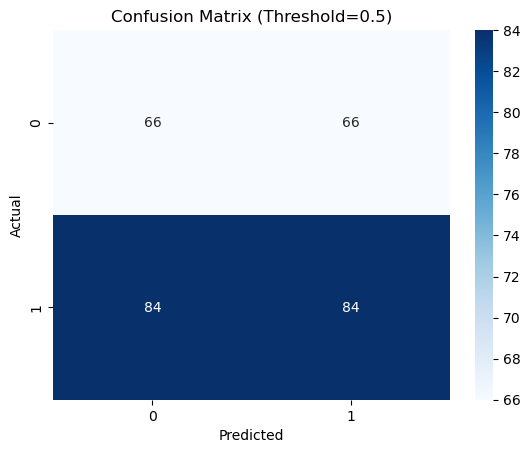

In [24]:
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Threshold=0.5)")
plt.show()

In [25]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.44      0.50      0.47       132
           1       0.56      0.50      0.53       168

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.51      0.50      0.50       300



In [26]:
roc_auc=roc_auc_score(y_test,y_prob)
roc_auc

np.float64(0.5136183261183261)

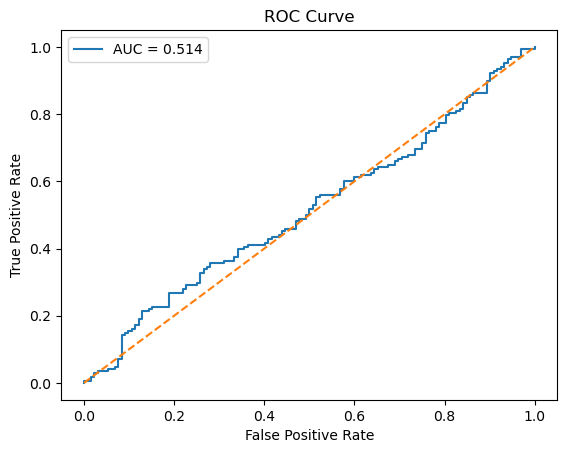

In [27]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [28]:
custom_threshold = 0.35
y_pred_custom = (y_prob >= custom_threshold).astype(int)

print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.56      0.99      0.72       168

    accuracy                           0.56       300
   macro avg       0.28      0.50      0.36       300
weighted avg       0.31      0.56      0.40       300



In [29]:
threshold_040 = 0.40

y_pred_040 = (y_prob >= threshold_040).astype(int)

print(classification_report(y_test, y_pred_040))


              precision    recall  f1-score   support

           0       0.57      0.03      0.06       132
           1       0.56      0.98      0.72       168

    accuracy                           0.56       300
   macro avg       0.57      0.51      0.39       300
weighted avg       0.57      0.56      0.43       300



In [30]:
threshold_045 = 0.45

y_pred_045 = (y_prob >= threshold_045).astype(int)

print(classification_report(y_test, y_pred_045))

              precision    recall  f1-score   support

           0       0.42      0.17      0.24       132
           1       0.55      0.82      0.66       168

    accuracy                           0.53       300
   macro avg       0.48      0.49      0.45       300
weighted avg       0.49      0.53      0.47       300



In [31]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)


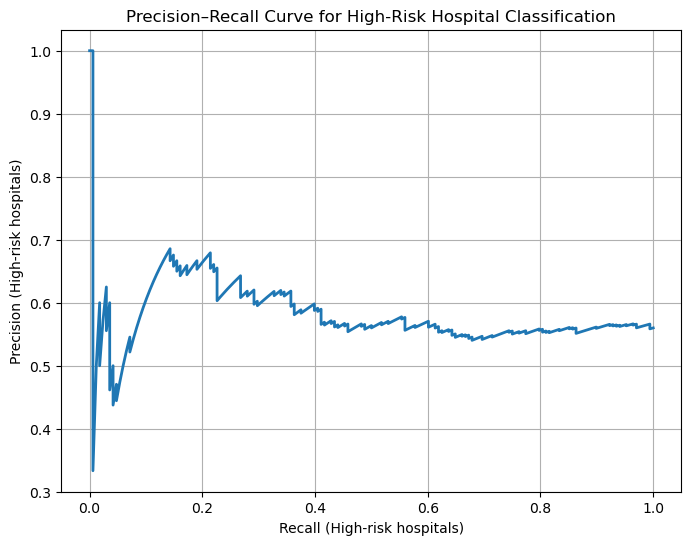

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2)
plt.xlabel("Recall (High-risk hospitals)")
plt.ylabel("Precision (High-risk hospitals)")
plt.title("Precision–Recall Curve for High-Risk Hospital Classification")
plt.grid(True)
plt.show()


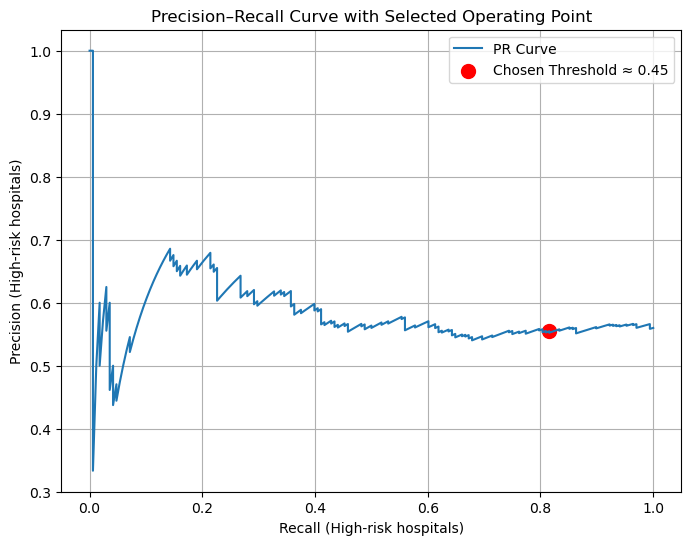

In [33]:
chosen_threshold = 0.45

# Find closest threshold index
idx = np.argmin(np.abs(thresholds - chosen_threshold))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="PR Curve")
plt.scatter(
    recall[idx],
    precision[idx],
    color="red",
    s=100,
    label=f"Chosen Threshold ≈ {chosen_threshold}"
)

plt.xlabel("Recall (High-risk hospitals)")
plt.ylabel("Precision (High-risk hospitals)")
plt.title("Precision–Recall Curve with Selected Operating Point")
plt.legend()
plt.grid(True)
plt.show()
